In [1]:
import random

import matplotlib.pyplot as plt
from util.model import LogisticRegression, Regular
from util import MNIST
%matplotlib inline

In [2]:
mnist = MNIST(root="./data", transform=[lambda x: x / 255.0, lambda x: x.reshape(x.shape[0], -1)]) #transform 原始数据 范围0-255,shape 28x28

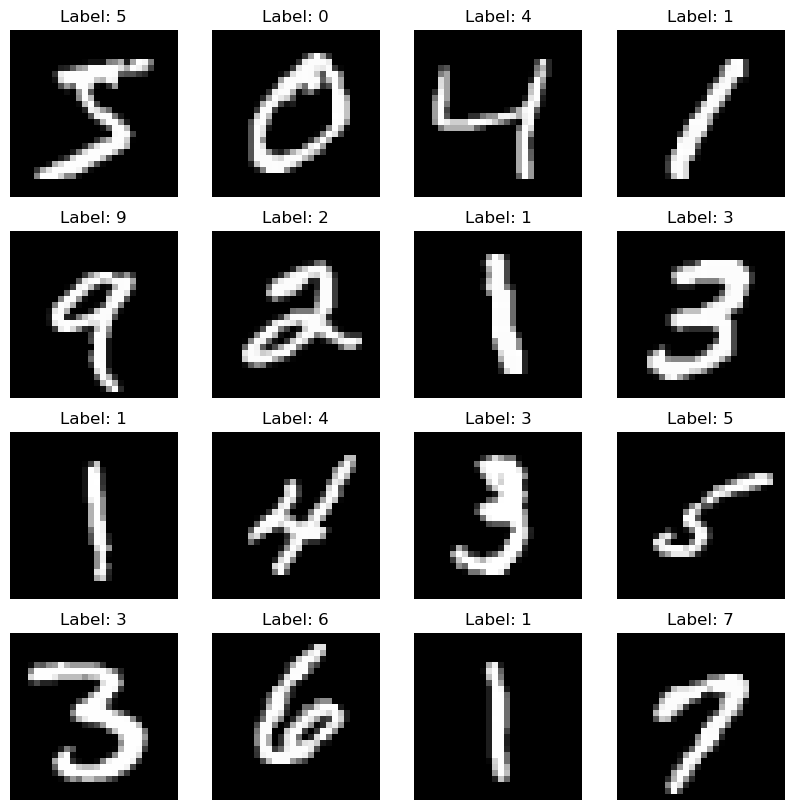

In [7]:
#加载数据
train_images, train_labels = mnist.train_images, mnist.train_labels
test_images, test_labels = mnist.test_images, mnist.test_labels
#随机显示其中8张图片
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {train_labels[random.randint(0, len(train_labels))]}")
    plt.axis("off")

In [4]:
lr = 1e-1
epochs = 50
regulation = Regular(lamda=0.01, method="L1")
# regulation = None
model = LogisticRegression(lr, epochs, regulation)
model.fit(train_images, train_labels, "")

[epoch:50/50]: 100%|██████| 50/50 [00:07<00:00,  6.92it/s, acc=0.275, loss=5.31]


In [5]:
# 预测
y_pred = model.predict(test_images)
# accuracy
accuracy = model.cal_accuracy(test_labels, y_pred)
accuracy

0.2774

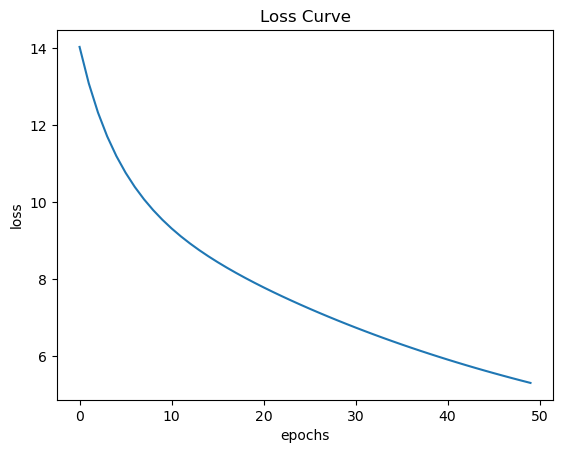

In [6]:

plt.plot(model.loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title(f"Loss Curve")
plt.show()